In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import glob
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
folder_path = "/content/drive/MyDrive/algotrade"
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

data = {}
for file in files:
    instrument_name = file.replace('.csv', '')
    data[instrument_name] = pd.read_csv(os.path.join(folder_path, file))

In [ ]:
for instrument, df in data.items():
    print(f"Columns for {instrument}: {df.columns}")

Columns for COPPER.CMDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024: Index(['Local time', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
Columns for DIESEL.CMDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024: Index(['Local time', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
Columns for GAS.CMDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024: Index(['Local time', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [ ]:
df.head()

,Local time,Open,High,Low,Close,Volume
0,01.01.2020 00:00:00.000 GMT-0500,2.179,2.179,2.179,2.179,0.0
1,01.01.2020 01:00:00.000 GMT-0500,2.179,2.179,2.179,2.179,0.0
2,01.01.2020 02:00:00.000 GMT-0500,2.179,2.179,2.179,2.179,0.0
3,01.01.2020 03:00:00.000 GMT-0500,2.179,2.179,2.179,2.179,0.0
4,01.01.2020 04:00:00.000 GMT-0500,2.179,2.179,2.179,2.179,0.0


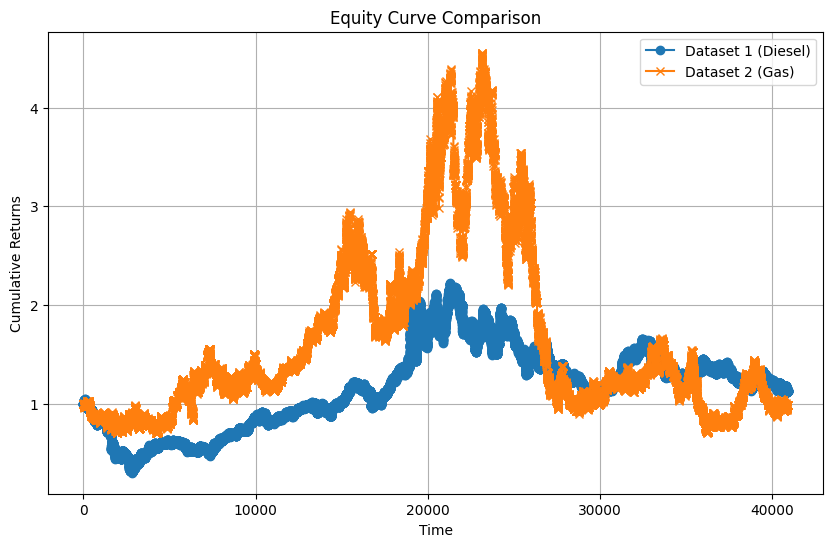

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load datasets from CSV files
data1 = pd.read_csv('/content/DIESEL.CMDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv')
data2 = pd.read_csv('/content/GAS.CMDUSD_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv')

# Ensure 'Close' column exists and calculate daily returns
data1['Return'] = data1['Close'].pct_change().fillna(0)
data2['Return'] = data2['Close'].pct_change().fillna(0)

# Compute cumulative returns
data1['Cumulative Return'] = (1 + data1['Return']).cumprod()
data2['Cumulative Return'] = (1 + data2['Return']).cumprod()

# Plot equity curves
plt.figure(figsize=(10, 6))
plt.plot(data1['Cumulative Return'], label='Dataset 1 (Diesel)', marker='o')
plt.plot(data2['Cumulative Return'], label='Dataset 2 (Gas)', marker='x')
plt.title('Equity Curve Comparison')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()



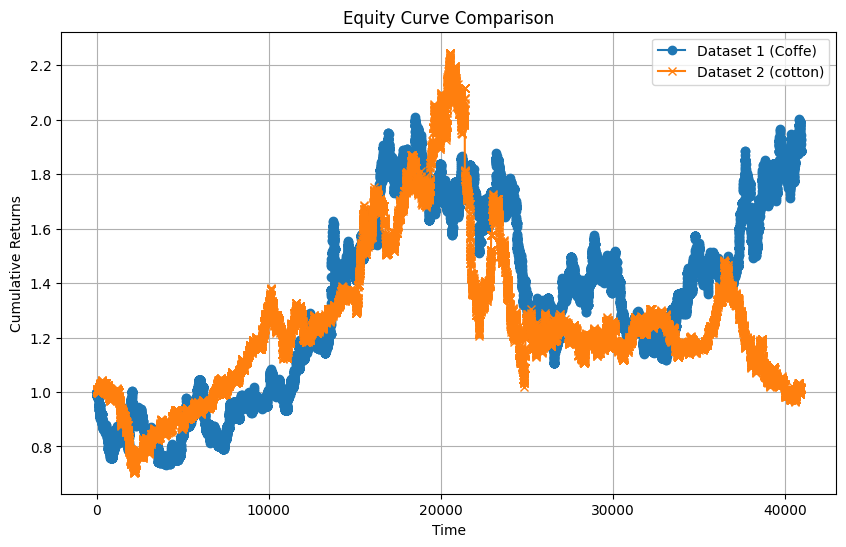

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load datasets from CSV files
data1 = pd.read_csv('/content/COFFEE.CMDUSX_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv')
data2 = pd.read_csv('/content/COTTON.CMDUSX_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv')

# Ensure 'Close' column exists and calculate daily returns
data1['Return'] = data1['Close'].pct_change().fillna(0)
data2['Return'] = data2['Close'].pct_change().fillna(0)

# Compute cumulative returns
data1['Cumulative Return'] = (1 + data1['Return']).cumprod()
data2['Cumulative Return'] = (1 + data2['Return']).cumprod()

# Plot equity curves
plt.figure(figsize=(10, 6))
plt.plot(data1['Cumulative Return'], label='Dataset 1 (Coffe)', marker='o')
plt.plot(data2['Cumulative Return'], label='Dataset 2 (cotton)', marker='x')
plt.title('Equity Curve Comparison')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()



# Data Cleaning

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

# Dataset class for PyTorch
class FinancialDataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

# Preprocess the data
for instrument, df in data.items():
    # Remove timezone and parse datetime
    df['Local time'] = df['Local time'].str.replace(r' GMT[+-]\d{4}', '', regex=True)
    df['Local time'] = pd.to_datetime(df['Local time'], format='%d.%m.%Y %H:%M:%S.%f')
    df['Hour'] = df['Local time'].dt.hour
    df['Day'] = df['Local time'].dt.day
    df['Month'] = df['Local time'].dt.month
    df['Day_of_Week'] = df['Local time'].dt.dayofweek

    # Drop unused columns
    df.drop(columns=['Local time'], inplace=True)

    # Features and target
    X = df.drop(columns=['Close']).values
    y = df['Close'].values

    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    # Convert to PyTorch tensors
    x_train = torch.tensor(x_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
    x_test = torch.tensor(x_test, dtype=torch.float32)
    y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

    # Create DataLoader
    train_dataset = FinancialDataset(x_train, y_train)
    test_dataset = FinancialDataset(x_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=64)

# Define the model using nn.Sequential
class FinancialModel(nn.Module):
    def __init__(self, input_size, hidden_size1=64, hidden_size2=32):
        super(FinancialModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),
            nn.Linear(hidden_size2, 1)  # Single output for regression
        )

    def forward(self, x):
        return self.layers(x)

    @staticmethod
    def loss(y_pred, y):
        return F.mse_loss(y_pred, y)

# Initialize model, optimizer, and hyperparameters
input_size = x_train.shape[1]
model = FinancialModel(input_size)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for features, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(features)
        loss = model.loss(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Log progress
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {train_loss / len(train_loader):.4f}")

# Evaluate the model
model.eval()
test_loss = 0.0
predictions = []
actuals = []
with torch.no_grad():
    for features, targets in test_loader:
        outputs = model(features)
        loss = model.loss(outputs, targets)
        test_loss += loss.item()
        predictions.extend(outputs.numpy().flatten())
        actuals.extend(targets.numpy().flatten())

# Calculate MAE and R-squared
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

# Calculate Mean Absolute Percentage Error (MAPE) and Percentage Accuracy
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(actuals, predictions)
percentage_accuracy = 100 - mape

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Percentage Accuracy: {percentage_accuracy:.2f}%")


print(f"Test Loss (MSE): {test_loss / len(test_loader):.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")


Epoch 1/100, Loss: 1.1688
Epoch 2/100, Loss: 0.0047
Epoch 3/100, Loss: 0.0021
Epoch 4/100, Loss: 0.0014
Epoch 5/100, Loss: 0.0010
Epoch 6/100, Loss: 0.0008
Epoch 7/100, Loss: 0.0007
Epoch 8/100, Loss: 0.0006
Epoch 9/100, Loss: 0.0005
Epoch 10/100, Loss: 0.0005
Epoch 11/100, Loss: 0.0005
Epoch 12/100, Loss: 0.0004
Epoch 13/100, Loss: 0.0004
Epoch 14/100, Loss: 0.0004
Epoch 15/100, Loss: 0.0004
Epoch 16/100, Loss: 0.0005
Epoch 17/100, Loss: 0.0004
Epoch 18/100, Loss: 0.0004
Epoch 19/100, Loss: 0.0004
Epoch 20/100, Loss: 0.0004
Epoch 21/100, Loss: 0.0003
Epoch 22/100, Loss: 0.0003
Epoch 23/100, Loss: 0.0004
Epoch 24/100, Loss: 0.0004
Epoch 25/100, Loss: 0.0003
Epoch 26/100, Loss: 0.0004
Epoch 27/100, Loss: 0.0003
Epoch 28/100, Loss: 0.0003
Epoch 29/100, Loss: 0.0003
Epoch 30/100, Loss: 0.0003
Epoch 31/100, Loss: 0.0003
Epoch 32/100, Loss: 0.0003
Epoch 33/100, Loss: 0.0003
Epoch 34/100, Loss: 0.0003
Epoch 35/100, Loss: 0.0003
Epoch 36/100, Loss: 0.0003
Epoch 37/100, Loss: 0.0003
Epoch 38/1

Backtesting

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

class FinancialDataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

class FinancialModel(nn.Module):
    def __init__(self, input_size, hidden_size1=64, hidden_size2=32):
        super(FinancialModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),
            nn.Linear(hidden_size2, 1)
        )

    def forward(self, x):
        return self.layers(x)

    @staticmethod
    def loss(y_pred, y):
        return F.mse_loss(y_pred, y)

def preprocess_data(df):
    if 'Local time' in df.columns:
        df['Local time'] = df['Local time'].str.replace(r' GMT[+-]\d{4}', '', regex=True)
        df['Local time'] = pd.to_datetime(df['Local time'], format='%d.%m.%Y %H:%M:%S.%f')
        df['Hour'] = df['Local time'].dt.hour
        df['Day'] = df['Local time'].dt.day
        df['Month'] = df['Local time'].dt.month
        df['Day_of_Week'] = df['Local time'].dt.dayofweek
        df.drop(columns=['Local time'], inplace=True)

    X = df.drop(columns=['Close']).values
    y = df['Close'].values

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    x_train = torch.tensor(x_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
    x_test = torch.tensor(x_test, dtype=torch.float32)
    y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

    train_dataset = FinancialDataset(x_train, y_train)
    test_dataset = FinancialDataset(x_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=64)

    return train_loader, test_loader, x_train.shape[1]

def train_model(model, train_loader, optimizer, epochs):
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for features, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(features)
            loss = model.loss(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {train_loss / len(train_loader):.4f}")

def evaluate_model(model, test_loader):
    model.eval()
    test_loss = 0.0
    predictions = []
    actuals = []
    with torch.no_grad():
        for features, targets in test_loader:
            outputs = model(features)
            loss = model.loss(outputs, targets)
            test_loss += loss.item()
            predictions.extend(outputs.numpy().flatten())
            actuals.extend(targets.numpy().flatten())
    return predictions, actuals, test_loss / len(test_loader)

def calculate_metrics(actuals, predictions):
    mae = mean_absolute_error(actuals, predictions)
    r2 = r2_score(actuals, predictions)
    mape = np.mean(np.abs((np.array(actuals) - np.array(predictions)) / np.array(actuals))) * 100
    percentage_accuracy = 100 - mape
    return mae, r2, mape, percentage_accuracy

def main(data):
    for instrument, df in data.items():
        print(f"\nProcessing {instrument}")
        train_loader, test_loader, input_size = preprocess_data(df)

        model = FinancialModel(input_size)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

        train_model(model, train_loader, optimizer, epochs=100)

        predictions, actuals, test_loss = evaluate_model(model, test_loader)
        mae, r2, mape, percentage_accuracy = calculate_metrics(actuals, predictions)

        print(f"Results for {instrument}:")
        print(f"Test Loss (MSE): {test_loss:.4f}")
        print(f"Mean Absolute Error (MAE): {mae:.4f}")
        print(f"R-squared (R2): {r2:.4f}")
        print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
        print(f"Percentage Accuracy: {percentage_accuracy:.2f}%")

if __name__ == "__main__":
    # Assuming 'data' is a dictionary containing DataFrames for each instrument
    main(data)

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Hour,Day,Month,Day_of_Week
0,2.179,2.179,2.179,2.179,0.0,0,1,1,2
1,2.179,2.179,2.179,2.179,0.0,1,1,1,2
2,2.179,2.179,2.179,2.179,0.0,2,1,1,2
3,2.179,2.179,2.179,2.179,0.0,3,1,1,2
4,2.179,2.179,2.179,2.179,0.0,4,1,1,2


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'data' is your preprocessed DataFrame
X = data.drop('Close', axis=1)
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest MSE: {mse}")
print(f"Random Forest R2 Score: {r2}")

Random Forest MSE: 0.021295486595075654
Random Forest R2 Score: 0.999945546434964


In [ ]:
import pandas as pd
import torch
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/COTTON.CMDUSX_Candlestick_1_Hour_BID_01.01.2020-31.08.2024.csv')

# Preprocess the data
def preprocess_data(df):
    # Remove timezone and parse datetime
    df['Local time'] = df['Local time'].str.replace(r' GMT[+-]\d{4}', '', regex=True)
    df['Local time'] = pd.to_datetime(df['Local time'], format='%d.%m.%Y %H:%M:%S.%f')

    # Extract time features
    df['Hour'] = df['Local time'].dt.hour
    df['Day'] = df['Local time'].dt.day
    df['Month'] = df['Local time'].dt.month
    df['Day_of_Week'] = df['Local time'].dt.dayofweek

    # Drop unused columns
    df.drop(columns=['Local time'], inplace=True)

    return df

# Preprocess the dataset
data = preprocess_data(data)

# Features and target
X = data.drop(columns=['Close']).values
y = data['Close'].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the new dataset into a DataFrame
new_data = pd.DataFrame(data)

# Preprocess the new dataset
X_new = new_data.drop(columns=['Close']).values
X_new_scaled = scaler.transform(X_new)
X_new_tensor = torch.tensor(X_new_scaled, dtype=torch.float32)

# Predict on the new dataset
model.eval()
with torch.no_grad():
    predictions_new = model(X_new_tensor).numpy().flatten()

# Define "Buy" and "Sell" rules
def recommend_action(open_price, predicted_close_price):
    if predicted_close_price > open_price:  # If predicted close is higher than open
        return "Buy"
    elif predicted_close_price < open_price:  # If predicted close is lower than open
        return "Sell"
    else:
        return "Hold"

# Add predictions and recommendations to the new dataset
new_data['Predicted_Close'] = predictions_new
new_data['Recommendation'] = new_data.apply(
    lambda row: recommend_action(row['Open'], row['Predicted_Close']), axis=1
)

# Display results
#print(new_data[['Open', 'Predicted_Close', 'Recommendation']])
new_data.head()


,Open,High,Low,Close,Volume,Hour,Day,Month,Day_of_Week,Predicted_Close,Recommendation
0,68.871,68.871,68.871,68.871,0.0,0,1,1,2,1.872054,Sell
1,68.871,68.871,68.871,68.871,0.0,1,1,1,2,1.871701,Sell
2,68.871,68.871,68.871,68.871,0.0,2,1,1,2,1.871348,Sell
3,68.871,68.871,68.871,68.871,0.0,3,1,1,2,1.871000,Sell
4,68.871,68.871,68.871,68.871,0.0,4,1,1,2,1.870660,Sell


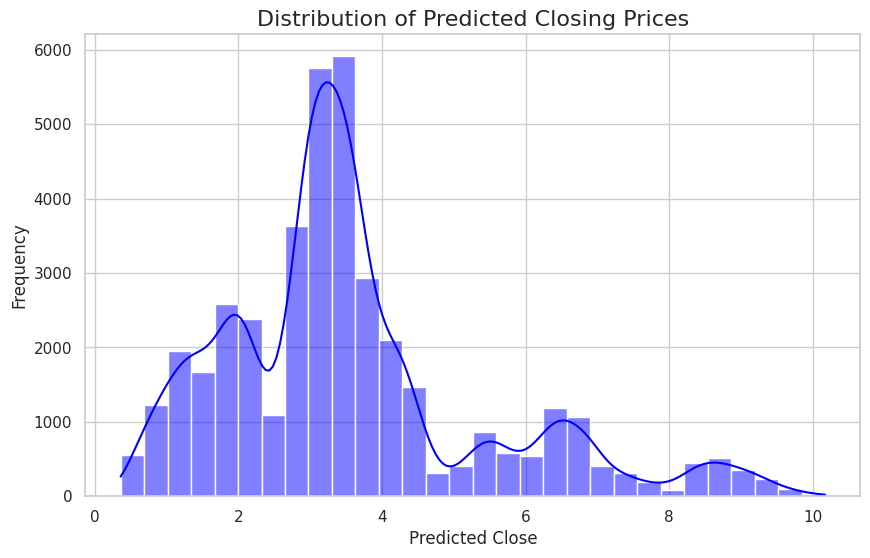

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn plots
sns.set_theme(style="whitegrid")

# Plot 1: Distribution of Predicted Closing Prices
plt.figure(figsize=(10, 6))
sns.histplot(new_data['Predicted_Close'], kde=True, color='blue', bins=30)
plt.title("Distribution of Predicted Closing Prices", fontsize=16)
plt.xlabel("Predicted Close", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

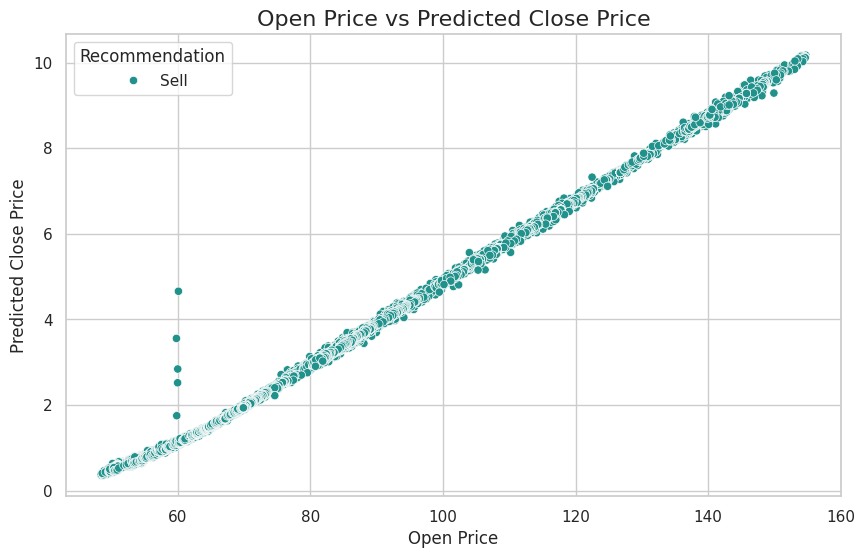

In [ ]:
# Plot 2: Relationship Between Open Price and Predicted Close Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Open', y='Predicted_Close', hue='Recommendation', data=new_data, palette='viridis')
plt.title("Open Price vs Predicted Close Price", fontsize=16)
plt.xlabel("Open Price", fontsize=12)
plt.ylabel("Predicted Close Price", fontsize=12)
plt.legend(title="Recommendation")
plt.show()


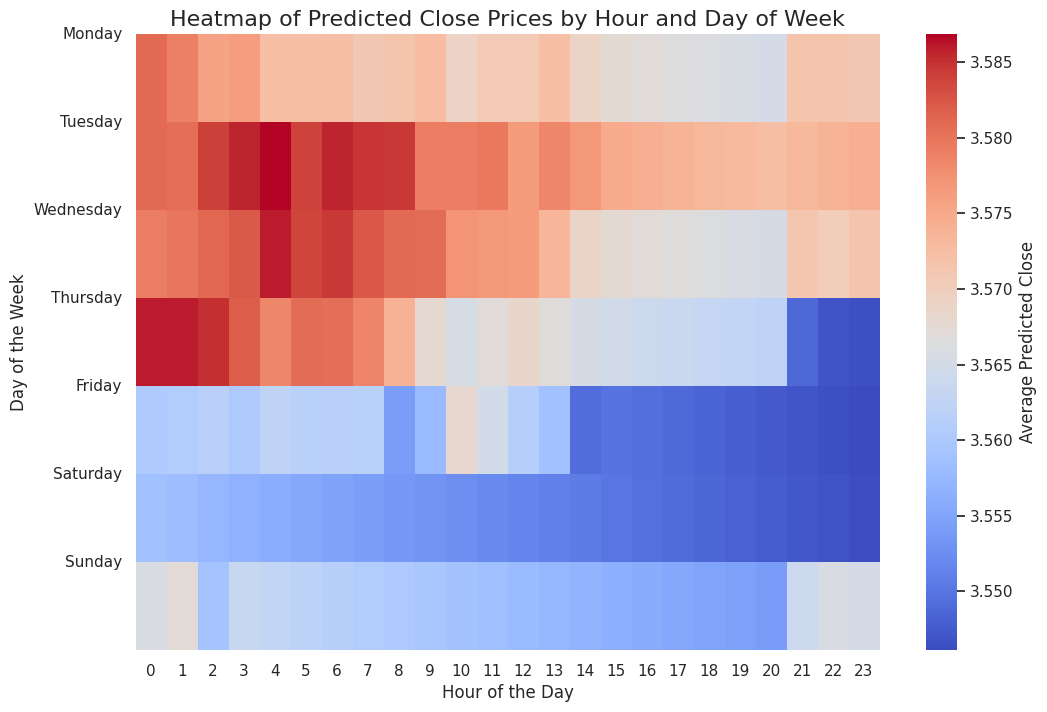

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for the heatmap
heatmap_data = new_data.pivot_table(
    index='Day_of_Week',  # Rows: Days of the Week
    columns='Hour',       # Columns: Hours of the Day
    values='Predicted_Close',  # Values: Predicted Close Prices
    aggfunc='mean'        # Aggregate by mean
)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=False,  # Set to True if you want numeric values displayed in cells
    fmt=".2f",
    cmap='coolwarm',
    cbar_kws={'label': 'Average Predicted Close'}
)

# Title and labels
plt.title("Heatmap of Predicted Close Prices by Hour and Day of Week", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Day of the Week", fontsize=12)

# Customize y-axis tick labels for days
plt.yticks(
    ticks=range(7),
    labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    rotation=0
)

plt.show()


In [ ]:
!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 10.8 MB/s eta 0:00:00


In [ ]:
!pip install transformers sentence-transformers


In [ ]:
from transformers import pipeline
from sentence_transformers import SentenceTransformer
import faiss
import pandas as pd

# Initialize the embedding model and FAISS index
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")  # Lightweight embedding model
dimension = 384  # Dimension of the embedding model output
index = faiss.IndexFlatL2(dimension)


# Generate embeddings and store them in FAISS
# texts = [
#     f"Hour {row['Hour']}: Predicted closing price is {row['Predicted_Close']:.2f}. Recommendation: {row['Recommendation']}."
#     for _, row in new_data.iterrows()
# ]

texts = [
    f"Open: {row['Open']:.3f}, High: {row['High']:.3f}, Low: {row['Low']:.3f}, Close: {row['Close']:.3f}, "
    f"Volume: {row['Volume']:.1f}, Hour: {row['Hour']}, Day: {row['Day']}, Month: {row['Month']}, "
    f"Day of Week: {row['Day_of_Week']}, Predicted Close: {row['Predicted_Close']:.6f}, "
    f"Recommendation: {row['Recommendation']}."
    for _, row in new_data.iterrows()
]

embeddings = embedding_model.encode(texts, convert_to_tensor=False)
index.add(embeddings)

# Define a function to retrieve relevant context
def retrieve_context(query, k=3):
    query_embedding = embedding_model.encode([query], convert_to_tensor=False)
    distances, indices = index.search(query_embedding, k)
    return "\n".join([texts[i] for i in indices[0]])

# QA pipeline
qa_pipeline = pipeline("question-answering", model="distilbert-base-cased-distilled-squad")

# Questions and retrieval
questions = [
    "When should I buy?",
    "When should I sell?",
    "What is the predicted closing price at hour 5?"
]

for question in questions:
    context = retrieve_context(question)
    result = qa_pipeline(question=question, context=context)
    print(f"Question: {question}")
    #print(f"Context: {context}")
    print(f"Answer: {result['answer']}\n")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Question: When should I buy?
Answer: Hour: 17, Day: 30

Question: When should I sell?
Answer: Hour: 15, Day: 30

Question: What is the predicted closing price at hour 5?
Answer: 20

